# Understanding variability in name profile across diferent academic sectors
I will work with the Italy document, wich contains a list of people with his gender, institution, city, region, sector, first and last name, field and year. The porpose of this proyect is to try to analice the data and see if is posible to give an hypotesis about why the name distribution across sectors don't look like a random sample of names. 


## Null Hyphotesis
Given the total Sample espace $S$, with $|S|=N$ the number of people in the population, the name of each people has asociated a random variable $X$ which can take any balue between $\{1,2,...,N\}$, with probability $\{p_1,p_2,...,p_N\}$, where the value of $X$ represents the number of people on the sample with the same name. The aproximation for the values of $\{p_i\}$ would be given by $\{\hat{p}_i\} = \{f_i\}$, which is the number of names that are repeated $i$ times in the population, divided by $N$. The null hyphotesis is that the variables $X$ are i.i.d variables. The expected value and the variance of $X$ can be aproximated by, $\mathbb{E}[X] \approx \sum_{k=1}^N k f_k = \bar{x}$ and $\mathbb{V}[X] \approx \sum_{k=1}^N (\bar{x} - k)^2 f_k = \rho ^2$. In a theoretical point of beaw, it exist the problem that $\bar{x}$ increas, as $N$ increase (the probability that there exist a name that is repited many times increase), so there is no reason to asume that the expected value would tend to a finite number. For this reason, I will asume that this cuantities depend on $N_m$, the size of the subsamples, and will be aproximated, given an ensamble $M$, $|M| = m$, of subsamples of size $N_m$ as $\mathbb{E}[X]_m \approx (1/m)\sum_{k=1}^m  \bar{x}_k $ and $\mathbb{V}[X]_m \approx (1/m)\sum_{k=1}^m \rho^2$ (For convinience I will work with the standar deviation $\rho$, and the mean value of the standar deviation). I will asume that deviations from this ensamble averages are due to gaussian noise. 


In [4]:
#extracting the relevant information needed to test the null hyphotesis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import scipy as sp
import sklearn.linear_model

italyData = pd.read_csv('italy_clean.csv')
italyData.drop('Unnamed: 10',inplace = True , axis = 1)
italyData.drop('Unnamed: 11',inplace = True , axis = 1)
italyData = italyData.astype('category')
italyData

,gender,rank,institution,city,region,sector,first,last,field,year
0,M,associate professor,Salerno,Salerno,Campania,Math,andrea francesco,abate,INF/01,2015
1,M,professor,Pisa,Pisa,Toscana,Math,marco,abate,MAT/03,2015
2,F,assistant professor,Politecnico Milano,Milano,Lombardia,Math,antonella,abba,MAT/07,2015
3,M,associate professor,Bari,Bari,Puglia,Math,fabio,abbattista,INF/01,2015
4,F,associate professor,Torino,Torino,Piemonte,Math,elsa,abbena,MAT/03,2015
...,...,...,...,...,...,...,...,...,...,...
54097,M,professor,Link Campus,Roma,Lazio,Soc,sergio,zoppi,SPS/08,2015
54098,M,assistant professor,Campania,Caserta,Campania,Soc,angelo,zotti,SPS/07,2015
54099,M,associate professor,Milano,Milano,Lombardia,Soc,francesco,zucchini,SPS/04,2015
54100,M,professor,Bologna,Bologna,Emilia-Romagna,Soc,paolo,zurla,SPS/07,2015


In [5]:
def meanDF(df,col):
    mean = np.array(df.groupby(col).size())
    mean = mean[mean!=0]
    return np.mean(mean)
def varianceDF(df,col):
    mean = np.array(df.groupby(col).size())
    mean = mean[mean!=0]
    return (np.std(mean))

meanFirst = meanDF(italyData,'first')
meanLast = meanDF(italyData,'last')
varianceFirst = varianceDF(italyData,'first')
varianceFirst = varianceDF(italyData,'last')
print(' mean of the first name: ',meanFirst,'\n mean of the last name: ', meanLast,'\n std of the first name:', varianceFirst,'\n std of the last name:',varianceFirst)

 mean of the first name:  8.412688539884932 
 mean of the last name:  2.1468195706519584 
 std of the first name: 3.6383404231086898 
 std of the last name: 3.6383404231086898


 mean of the ensamble first name:  1.2589966435964879 
 mean of the ensamble last name:  1.0046671427083798 
 std of the ensamble first name: 0.11344437477861109 
 std of the ensamble last name: 0.05578614875247011


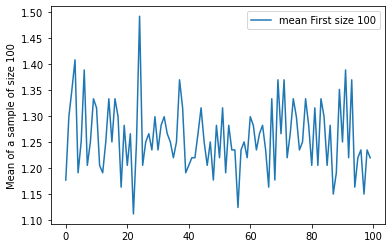

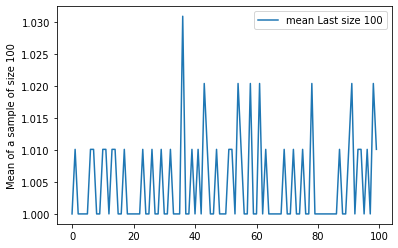

In [6]:
def ensambleMV(df,col,N,m):
    
    ensambleMean=[]
    ensambleVariance = []
    ensambleShuffled = shuffle(italyData)
    for i in range(m):
        ensambleMean.append(meanDF(ensambleShuffled.iloc[i*N:(i+1)*N],col))
        ensambleVariance.append(varianceDF(ensambleShuffled.iloc[i*N:(i+1)*N],col))
    return ensambleMean,ensambleVariance

ensambleMeanFirst,ensambleVarianceFirst = ensambleMV(italyData,'first',100,100)
ensambleMeanLast,ensambleVarianceLast = ensambleMV(italyData,'last',100,100)
    
print(' mean of the ensamble first name: ',np.mean(ensambleMeanFirst),'\n mean of the ensamble last name: ', np.mean(ensambleMeanLast),'\n std of the ensamble first name:', np.std(ensambleVarianceFirst),'\n std of the ensamble last name:',np.std(ensambleVarianceLast))
plt.plot(np.arange(100),ensambleMeanFirst,label = 'mean First size 100')
plt.ylabel('Mean of a sample of size 100')
plt.legend()
plt.show()
plt.plot(np.arange(100),ensambleMeanLast,label = 'mean Last size 100')
plt.ylabel('Mean of a sample of size 100')
plt.legend()
plt.show()

For an ensamble of $N_m = |M| = 100$, the mean is almost constant with variance close to zero. Ignoring the variance, let's see the relation between the mean and the size $N_m$:

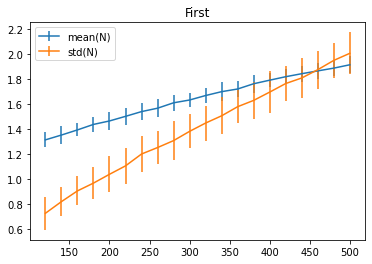

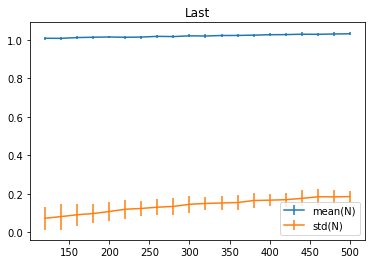

In [7]:
ensambleMeanFirst = [[],[]]
ensambleVarianceFirst = [[],[]]
ensambleMeanLast = [[],[]]
ensambleVarianceLast = [[],[]]
for N in (np.arange(1,21)*20 + 100):
    ensambleMeanFirst[0].append(np.mean(ensambleMV(italyData,'first',N,100)[0]))
    ensambleMeanFirst[1].append(np.std(ensambleMV(italyData,'first',N,100)[0]))
    ensambleVarianceFirst[0].append(np.mean(ensambleMV(italyData,'first',N,100)[1]))
    ensambleVarianceFirst[1].append(np.std(ensambleMV(italyData,'first',N,100)[1]))
    ensambleMeanLast[0].append(np.mean(ensambleMV(italyData,'last',N,100)[0]))
    ensambleMeanLast[1].append(np.std(ensambleMV(italyData,'last',N,100)[0]))
    ensambleVarianceLast[0].append(np.mean(ensambleMV(italyData,'last',N,100)[1]))
    ensambleVarianceLast[1].append(np.std(ensambleMV(italyData,'last',N,100)[1]))
plt.title('First')   
plt.errorbar(np.arange(1,21)*20+100, ensambleMeanFirst[0],yerr = ensambleMeanFirst[1],label='mean(N)')
plt.errorbar(np.arange(1,21)*20+100, ensambleVarianceFirst[0],yerr = ensambleVarianceFirst[1],label='std(N)')
plt.legend()
plt.show()
plt.title('Last')   
plt.errorbar(np.arange(1,21)*20+100, ensambleMeanLast[0],yerr = ensambleMeanLast[1],label='mean(N)')
plt.errorbar(np.arange(1,21)*20+100, ensambleVarianceLast[0],yerr = ensambleVarianceLast[1],label='std(N)')
plt.legend()
plt.show()

In [8]:

slope, intercept, r_value, p_value, std_err = sp.stats.linregress((np.arange(1,21)*20+100),ensambleMeanFirst[0])
print(slope,intercept,r_value,p_value,std_err)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress((np.arange(1,21)*20+100),ensambleVarianceFirst[0])
print(slope,intercept,r_value,p_value,std_err)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress((np.arange(1,21)*20+100),ensambleMeanLast[0])
print(slope,intercept,r_value,p_value,std_err)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress((np.arange(1,21)*20+100),ensambleVarianceLast[0])
print(slope,intercept,r_value,p_value,std_err)


0.0015794642911214193 1.1482661786168182 0.9973834166360017 5.408327880776428e-22 2.6984192354514618e-05
0.0032943052142758336 0.3757182828643191 0.9989768604203424 1.1624090497912396e-25 3.515146895818979e-05
6.192580195528621e-05 1.0003912120141858 0.9900261318596492 8.947284561389668e-17 2.077064245177709e-06
0.00029531982152511974 0.04795418568938199 0.9866625462574099 1.2086217621155916e-15 1.1483815786263896e-05


This curves give an empirical wey of estimating the mean and variance of a subsample of size $N_m$, as
$$\bar{x}_{N_f} = 0.0015749700068731036N + 1.1502453907010457$$,
$$std(x)_{N_f} = 0.37434244289920593 + 0.0033013521356937752N$$,
$$\bar{x}_{N_l} = 5.655532992961886e-05N +1.0020929691087934$$,
$$std(x)_{N_l} = 0.05016557233523823 + 0.00029098640511084577N$$.

Asuming that deviations are due to gaussian noise, a subsample with mean $\bar{x}_m$ and estandar deviation $\rho_m$ farder away than 2 times the estandar deviation of the ensamble mean would have a p-value less that 5%, which would be enough to reject the null hypothesis.

## Testing the null hypothesis
Let's test the null hypothesis for the diferent sectors of the data set

In [170]:
def ensambleMV2(df,col,N,m):
    
    ensambleMean=[]
    ensambleVariance = []
    
    for i in range(m):
        ensambleShuffled = shuffle(df)
        ensambleMean.append(meanDF(ensambleShuffled.iloc[0:N],col))
        ensambleVariance.append(varianceDF(ensambleShuffled.iloc[0:N],col))
    return ensambleMean,ensambleVariance


def doesItLookRandom(df,m,name):
    randomMeanF = []
    randomStdF = []
    randomMeanL = []
    randomStdL = []
    text = ''
    sectionData = pd.DataFrame(df.groupby(name).size().keys(),columns=[name])
    for sec in sectionData.sort_values(by=[name])[name].unique():
        subsample = df[df[name] == sec]
        N=subsample.shape[0]
        meanFirst = meanDF(subsample,'first')
        meanLast = meanDF(subsample,'last')
        varianceFirst = varianceDF(subsample,'first')
        varianceLast = varianceDF(subsample,'last')
        ensambleMeanFirst,ensambleVarianceFirst = ensambleMV2(df,'first',N,m)
        ensambleMeanLast,ensambleVarianceLast = ensambleMV2(df,'last',N,m)
        randomMeanF.append(np.mean(ensambleMeanFirst))
        randomStdF.append(np.mean(ensambleVarianceFirst))
        randomMeanL.append(np.mean(ensambleMeanLast))
        randomStdL.append(np.mean(ensambleVarianceLast))

        if (np.abs(np.mean(ensambleMeanFirst)-meanFirst) <= 2*np.std(ensambleMeanFirst)) & (np.abs(np.mean(ensambleVarianceFirst)-varianceFirst) <= 2*np.std(ensambleVarianceFirst)):
            text += sec + ' first names are a typical set\n'
        else:
            text += sec + ' first names are not a typical set\n'
        if (np.abs(np.mean(ensambleMeanLast)-meanLast) <= 2*np.std(ensambleMeanLast)) & (np.abs(np.mean(ensambleVarianceLast)-varianceLast) <= 2*np.std(ensambleVarianceLast)):
            text += sec + ' last names are a typical set\n'
        else:
            text += sec + ' last names are not a typical set\n'
    return randomMeanF,randomStdF, randomMeanL,randomStdL,text
randomMeanF,randomStdF,randomMeanL,randomStdL,text = doesItLookRandom(italyData,400,'sector')
print(text)
        
    

Agr first names are a typical set
Agr last names are a typical set
Bio first names are not a typical set
Bio last names are a typical set
Chem first names are a typical set
Chem last names are a typical set
Econ first names are a typical set
Econ last names are a typical set
Eng-Civ first names are a typical set
Eng-Civ last names are a typical set
Eng-Ind first names are not a typical set
Eng-Ind last names are a typical set
Geo first names are not a typical set
Geo last names are a typical set
Hist-Ped-Psi first names are not a typical set
Hist-Ped-Psi last names are a typical set
Hum first names are not a typical set
Hum last names are not a typical set
Law first names are not a typical set
Law last names are not a typical set
Math first names are a typical set
Math last names are a typical set
Med first names are not a typical set
Med last names are not a typical set
Phys first names are not a typical set
Phys last names are a typical set
Soc first names are not a typical set
Soc l

Bio first, Eng-Ing first, Geo first, Hist-Ped-Psi first, Hum first, Law first, Math first, Med first, Phys first, Soc first ---> are not tipycal sets. Hum last, Law last, Med last are the only sectors were the last name is not part of the tipycal set. 
This is an aproximation in order to know if the sets are typical or not, but many of them regect the null hypothesis, so, the conclusion is that the distribution of names across the diferent sections are not randomly distributed. 



## Possible causes of this discrepancy
### Gender
In order to explain this discrepancy, there has to be noted that, the distribution of names are not independent. For example, mens and womans tend to have diferent names, and possibly, the same would happend for diferent regions. Let's study this relations.

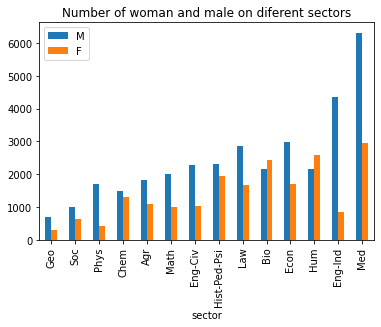

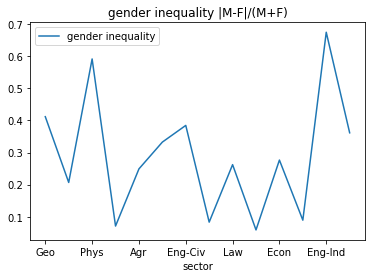

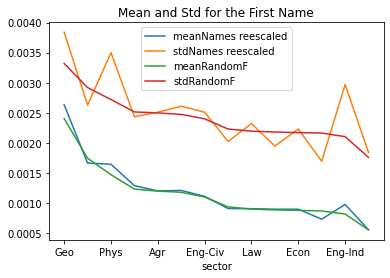

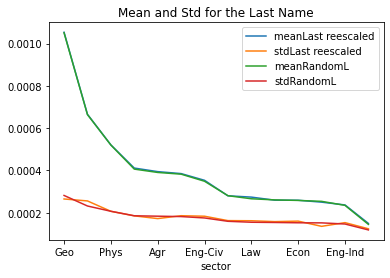

,sector,meanNames,stdNames,meanLast,stdLast,N,meanNames reescaled,stdNames reescaled,meanRandomF,stdRandomF,meanRandomL,stdRandomL,meanLast reescaled,stdLast reescaled,M,F,M+F,gender inequality
6,Geo,2.647368,3.862351,1.060063,0.266848,1006,0.002632,0.003839,0.002404,0.003321,0.001051,0.000282,0.001054,0.000265,710,296,1006,0.411531
13,Soc,2.727121,4.308651,1.091212,0.419644,1639,0.001664,0.002629,0.001745,0.002919,0.000664,0.000232,0.000666,0.000256,989,650,1639,0.206833
12,Phys,3.508224,7.465707,1.111516,0.441547,2133,0.001645,0.003500,0.001471,0.002720,0.000520,0.000207,0.000521,0.000207,1697,436,2133,0.591186
2,Chem,3.604381,6.805428,1.151029,0.518613,2797,0.001289,0.002433,0.001231,0.002514,0.000407,0.000186,0.000412,0.000185,1498,1299,2797,0.071148
0,Agr,3.513806,7.347496,1.155091,0.504928,2927,0.001200,0.002510,0.001197,0.002498,0.000391,0.000184,0.000395,0.000173,1828,1099,2927,0.249060
10,Math,3.622733,7.818396,1.154528,0.557670,2996,0.001209,0.002610,0.001178,0.002473,0.000383,0.000182,0.000385,0.000186,1996,1000,2996,0.332443
4,Eng-Civ,3.681465,8.324814,1.172914,0.609463,3317,0.001110,0.002510,0.001101,0.002400,0.000349,0.000176,0.000354,0.000184,2296,1021,3317,0.384383
7,Hist-Ped-Psi,3.858311,8.594397,1.190917,0.692178,4248,0.000908,0.002023,0.000936,0.002230,0.000281,0.000160,0.000280,0.000163,2301,1947,4248,0.083333
9,Law,4.086051,10.468415,1.236568,0.732404,4511,0.000906,0.002321,0.000899,0.002194,0.000266,0.000155,0.000274,0.000162,2847,1664,4511,0.262248
1,Bio,4.142601,8.992290,1.199429,0.730825,4619,0.000897,0.001947,0.000885,0.002180,0.000261,0.000154,0.000260,0.000158,2173,2446,4619,0.059104


In [163]:

def createNumericalDF(df,name):

    sectionData = pd.DataFrame(df.groupby(name).size().keys(),columns=[name])
    meanNames = []
    stdNames = []
    meanLast = []
    stdLast = []
    N = []
    for sec in sectionData[name]:
        N.append(df[df[name] == sec].shape[0])
        names = np.array(df[df[name] == sec].groupby('first').size())
        names = names[names != 0]
        last = np.array(df[df[name] == sec].groupby('last').size())
        last = last[last != 0]
        meanNames.append(np.mean(names))
        stdNames.append(np.std(names))
        meanLast.append(np.mean(last))
        stdLast.append(np.std(last))
    sectionData['meanNames'] = meanNames
    sectionData['stdNames'] = stdNames
    sectionData['meanLast'] = meanLast
    sectionData['stdLast'] = stdLast
    sectionData['N'] = N
    
    sectionData['meanNames reescaled'] = sectionData['meanNames'] / N
    sectionData['stdNames reescaled'] = sectionData['stdNames'] / N
    sectionData['meanRandomF'] = np.array(randomMeanF) / N
    sectionData['stdRandomF'] = np.array(randomStdF) / N

    sectionData['meanRandomL'] = np.array(randomMeanL) / N
    sectionData['stdRandomL'] = np.array(randomStdL) / N
    sectionData['meanLast reescaled'] = sectionData['meanLast']/N
    sectionData['stdLast reescaled'] = sectionData['stdLast']/N
    
    return sectionData
    
sectionData = createNumericalDF(italyData,'sector')
    
sectionData['M'] = np.array(italyData[italyData['gender']=='M'].groupby('sector').size())
sectionData['F'] = np.array(italyData[italyData['gender']=='F'].groupby('sector').size())

#defining gender inequality independent of N
sectionData['M+F']=sectionData['M'] + sectionData['F']
sectionData['gender inequality'] = 2*np.abs((sectionData['M']/sectionData['M+F']) -0.5)
    
sectionData.sort_values(by=['M+F']).plot(x='sector',y=['M','F'],kind = 'bar')
plt.title('Number of woman and male on diferent sectors')
plt.show()
sectionData.sort_values(by=['M+F']).plot(x='sector',y=['gender inequality'])
plt.title('gender inequality |M-F|/(M+F)')
plt.show()
sectionData.sort_values(by=['M+F']).plot(x='sector',y=['meanNames reescaled','stdNames reescaled', 'meanRandomF', 'stdRandomF'])
plt.title('Mean and Std for the First Name')
plt.show()
sectionData.sort_values(by=['M+F']).plot(x='sector',y=['meanLast reescaled','stdLast reescaled','meanRandomL','stdRandomL'])
plt.title('Mean and Std for the Last Name')
plt.show()
sectionData.sort_values(by=['M+F'])

In [164]:
np.corrcoef(np.array(sectionData['gender inequality']),np.array(sectionData['stdNames reescaled']))

array([[1.        , 0.67493337],
       [0.67493337, 1.        ]])

In [165]:
np.corrcoef(np.array(sectionData['gender inequality']),np.array(sectionData['stdLast reescaled']))

array([[1.        , 0.16062551],
       [0.16062551, 1.        ]])

Comment on this result:

1. The gender inequality |M-F|/(M+F) is strongly correlated with the stdNames reescaled, which is the variability on names. This sugest that, the gender is the factor that makes the distribution of names over diferent sections, not random. 
2. There is correlation between gender inequality and the variability of the last names, but is to week to conclude something.

Let't see if the distribution of names looks random conditional on a given gender:

The distribution of names given that the people are men
Agr first names are a typical set
Agr last names are a typical set
Bio first names are a typical set
Bio last names are a typical set
Chem first names are a typical set
Chem last names are a typical set
Econ first names are a typical set
Econ last names are a typical set
Eng-Civ first names are a typical set
Eng-Civ last names are a typical set
Eng-Ind first names are not a typical set
Eng-Ind last names are a typical set
Geo first names are a typical set
Geo last names are a typical set
Hist-Ped-Psi first names are a typical set
Hist-Ped-Psi last names are a typical set
Hum first names are not a typical set
Hum last names are a typical set
Law first names are not a typical set
Law last names are not a typical set
Math first names are a typical set
Math last names are a typical set
Med first names are a typical set
Med last names are not a typical set
Phys first names are a typical set
Phys last names are a typical set
Soc first n

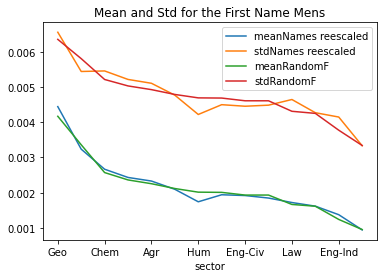

The distribution of names given that the people are woman
Agr first names are a typical set
Agr last names are a typical set
Bio first names are not a typical set
Bio last names are a typical set
Chem first names are not a typical set
Chem last names are a typical set
Econ first names are a typical set
Econ last names are a typical set
Eng-Civ first names are a typical set
Eng-Civ last names are a typical set
Eng-Ind first names are not a typical set
Eng-Ind last names are a typical set
Geo first names are not a typical set
Geo last names are a typical set
Hist-Ped-Psi first names are a typical set
Hist-Ped-Psi last names are a typical set
Hum first names are not a typical set
Hum last names are a typical set
Law first names are a typical set
Law last names are a typical set
Math first names are not a typical set
Math last names are a typical set
Med first names are a typical set
Med last names are a typical set
Phys first names are not a typical set
Phys last names are a typical set
S

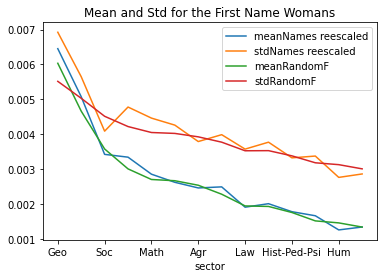

In [171]:
print('The distribution of names given that the people are men')
randomMeanF,randomStdF,randomMeanL,randomStdL,text = doesItLookRandom(italyData[italyData['gender']=='M'],300,'sector')
print(text)
sectionDataM = createNumericalDF(italyData[italyData['gender']=='M'],'sector')

sectionDataM.sort_values(by=['N']).plot(x='sector',y=['meanNames reescaled','stdNames reescaled', 'meanRandomF', 'stdRandomF'])
plt.title('Mean and Std for the First Name Mens')
plt.show()



print('The distribution of names given that the people are woman')
randomMeanF,randomStdF,randomMeanL,randomStdL,text = doesItLookRandom(italyData[italyData['gender']=='F'],300,'sector')
print(text)
sectionDataF = createNumericalDF(italyData[italyData['gender']=='F'],'sector')

sectionDataF.sort_values(by=['N']).plot(x='sector',y=['meanNames reescaled','stdNames reescaled', 'meanRandomF', 'stdRandomF'])
plt.title('Mean and Std for the First Name Womans')
plt.show()


In [176]:
np.corrcoef(np.array(sectionDataF['stdNames reescaled']),np.array(sectionDataF['stdLast reescaled']))

array([[1.        , 0.94596048],
       [0.94596048, 1.        ]])

In [177]:
np.corrcoef(np.array(sectionDataM['stdNames reescaled']),np.array(sectionDataM['stdLast reescaled']))

array([[1.        , 0.84524528],
       [0.84524528, 1.        ]])

Two comments:
1. Given that the names are gender independent, the sections that had atypical last names are still atypical. Which means that the gender inequality can't explain this.
2. The correlation between variation in names and last names is almost 1, which can be interprete as, finding the factor that explains one, can explain the other.
### Region

In [184]:
randomMeanF,randomStdF,randomMeanL,randomStdL,text = doesItLookRandom(italyData,400,'region')
print(text)
regionDataF = createNumericalDF(italyData[italyData['gender']=='F'],'region')
randomMeanM,randomStdM,randomMeanL,randomStdL,text = doesItLookRandom(italyData,400,'region')
regionDataM = createNumericalDF(italyData[italyData['gender']=='M'],'region')


Abruzzo first names are a typical set
Abruzzo last names are not a typical set
Basilicata first names are a typical set
Basilicata last names are not a typical set
Calabria first names are not a typical set
Calabria last names are not a typical set
Campania first names are not a typical set
Campania last names are not a typical set
Emilia-Romagna first names are not a typical set
Emilia-Romagna last names are not a typical set
Friuli-Venezia Giulia first names are not a typical set
Friuli-Venezia Giulia last names are a typical set
Lazio first names are not a typical set
Lazio last names are not a typical set
Liguria first names are not a typical set
Liguria last names are not a typical set
Lombardia first names are not a typical set
Lombardia last names are not a typical set
Marche first names are a typical set
Marche last names are not a typical set
Molise first names are a typical set
Molise last names are not a typical set
Piemonte first names are not a typical set
Piemonte last na

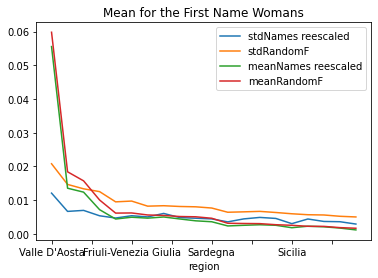

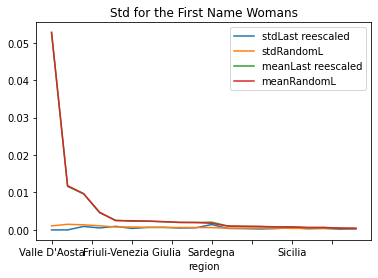

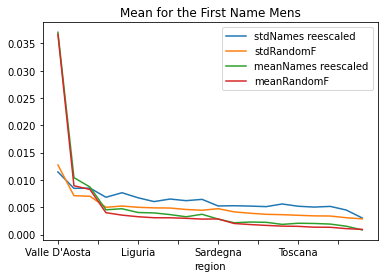

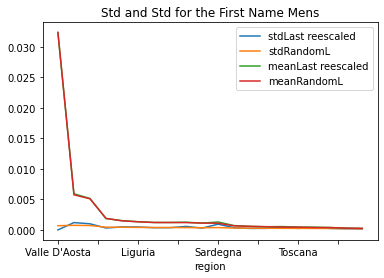

In [204]:
regionDataF.sort_values(by=['N']).plot(x='region',y=['stdNames reescaled', 'stdRandomF','meanNames reescaled', 'meanRandomF', ])
plt.title('Mean for the First Name Womans')
plt.show()

regionDataF.sort_values(by=['N']).plot(x='region',y=['stdLast reescaled', 'stdRandomL','meanLast reescaled', 'meanRandomL', ])
plt.title('Std for the First Name Womans')
plt.show()

regionDataM.sort_values(by=['N']).plot(x='region',y=['stdNames reescaled', 'stdRandomF','meanNames reescaled', 'meanRandomF', ])
plt.title('Mean for the First Name Mens')
plt.show()
regionDataM.sort_values(by=['N']).plot(x='region',y=['stdLast reescaled', 'stdRandomL','meanLast reescaled', 'meanRandomL', ])
plt.title('Std and Std for the First Name Mens')
plt.show()

The names over diferent regions is also not randomly distributed. There are regions where there are more common last names that other regions. Regions where the diference |meanRandomF - meanNames reescaled| is biger, are regions where there are more common names. 

In [1]:
ins = []
for reg in regionDataF.sort_values(by=['region'])['region']:
    insData = np.array(italyData[(italyData['gender']=='F') & (italyData['region'] == reg)].groupby('institution').size())
    ins.append(1/len(insData[insData !=0]))
regionDataF['1/#institutions'] = ins
ins = []
for reg in regionDataM.sort_values(by=['region'])['region']:
    insData = np.array(italyData[(italyData['gender']=='M') & (italyData['region'] == reg)].groupby('institution').size())
    ins.append(1/len(insData[insData !=0]))
regionDataM['1/#institutions'] = ins

regionDataM.sort_values(by=['N']).plot(x='region',y=['stdNames reescaled', 'stdRandomL'])
plt.title('stdNames')
plt.show()
regionDataM.sort_values(by=['N']).plot(x='region',y=[ '1/#institutions' ])
plt.title('Number of institutions')
plt.show()



NameError: name 'regionDataF' is not defined

In [225]:
np.corrcoef(np.array(regionDataF['1/#institutions']),np.array(regionDataF['stdNames reescaled']))

array([[1.        , 0.78062587],
       [0.78062587, 1.        ]])

In [226]:
np.corrcoef(np.array(regionDataM['1/#institutions']),np.array(regionDataM['stdNames reescaled']))

array([[1.        , 0.82585682],
       [0.82585682, 1.        ]])

There is a strong negative correlation between the number of institutions and the variability of names, with the gender fixed, for diferent regions. This sugest that, sectors where there is a biguer number of profesionals from a region with a smoller number of institutions, would tent to have more common names. 

## Conclusion

It was found that the distributions of names over diferent sectors are not drawn from a random distribution of i.i.d. draws. Looking for posible causes, it was found that the gender inequality is correlated with the variability of the first names. Conditional on a given gender, it was found that the distributions of names and last names was still not random. It was also found that the distribution of names over diferent regions is also not random, and is negatively correlated with the number of institutions in such regions. 

I especulate that this two, the gender inequality, and the region, are the most influencial causes for the distribution of names to deviate from the random prediction. The gender inequality makes the first names no i.i.d. The region would be important, because diferent regions would tent to have diferent common family names, which makes the last names also no i.i.d. Still, there could be othere reason for this discrepancy.